In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
!rm -rf sample_data

--2021-07-22 13:10:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-07-22 13:10:58 (101 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = pd.read_csv('/content/iris.data',header=None)

In [ ]:
s_v =np.array([5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9])
print(s_v*2)
d={'col1': s_v, 'col2': s_v*2}
test_df = pd.DataFrame(data=d)

means = test_df.agg('mean')
test_df_centered = test_df - means
res = test_df_centered.T.dot(test_df_centered)

print(res)

print(3.82/0.764)
w, v = np.linalg.eig(res)
print(w)
print(v)

[10.2  9.8  9.4  9.2 10.  10.8  9.2 10.   8.8  9.8]
       col1   col2
col1  0.764  1.528
col2  1.528  3.056
5.0
[0.   3.82]
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


## **PCA**

In [ ]:
sample1 = iris_data.iloc[:,0:2]
sample2 = iris_data.iloc[:,2:4]


means = sample1.agg('mean')
std_devs = sample1.agg('std')
sample_centered = sample1 - means
print("Sample")
print(sample1)
print("Sample centered")
print(sample_centered)
print("Means")
print(means)
print("Stdevs:")
print(std_devs)

sample_centered = sample_centered/std_devs

res = sample_centered.T.dot(sample_centered)
vars = np.trace(res)
print("Result")
print(res)
print("Vars")
print(vars)

w, v = np.linalg.eig(res)
#w = w/vars

sort_index = np.argsort(w)
print(sort_index)
print("REs W and Vs:")
print(w)
print(v)
print("Chosen V")
print( v[:,sort_index[-1]])
print(sort_index)
print("Projected")
test=v[:,sort_index[-1]].dot(sample_centered.T)
test_res_df = pd.DataFrame(test)
print(test_res_df)
ev_1=pd.DataFrame(v[:,sort_index[-1]])
test_back =test_res_df.dot(ev_1.T)

test_proj = sample_centered.dot(ev_1)
print("Test proj")

print(test_proj)



print("Centered")
print(sample_centered)

print("Back")
print(test_back)

print("Diff")
print(sample_centered - test_back)


# sample2.columns=[0,1]
# means2 = sample2.agg('mean')
# std_devs2 = sample2.agg('std')
# sample_centered2 = sample2 - means2

# print("Sample")
# print(sample2)
# print("Sample centered")
# print(sample_centered2)
# print("Means")
# print(means2)
# print("Stdevs:")
# print(std_devs2)

# res2 = sample_centered2.T.dot(sample_centered2)
# vars2 = np.trace(res2)
# print("Result")
# print(res2)
# print("Vars")
# print(vars2)
# w2, v2 = np.linalg.eig(res)
# #w2 = w2/vars2

# sort_index2 = np.argsort(w2)
# print(sort_index2)
# print("REs W and Vs:")
# print(w2)
# print(v2)
# print("Chosen V")
# print( v2[:,sort_index2[-1]])
# print(sort_index2)
# print("Projected")
# test2=v2[:,sort_index2[-1]].dot(sample_centered2.T)


# test_res_df2 = pd.DataFrame(test2)
# print(test_res_df2)
# ev2_1=pd.DataFrame(v2[:,sort_index2[-1]])
# print("EV shape")
# print(ev2_1.shape)
# test_back2 =test_res_df2.dot(ev2_1.T)

# test3 = sample_centered2.dot(ev2_1)
# print("PJ 2")
# print(test3)

# print("Centered")
# print(sample_centered2)

# print("Back")
# print(test_back2)

# print("Diff")
# print(sample_centered2 - test_back2)

Sample
       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
..   ...  ...
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]
Sample centered
            0      1
0   -0.743333  0.446
1   -0.943333 -0.054
2   -1.143333  0.146
3   -1.243333  0.046
4   -0.843333  0.546
..        ...    ...
145  0.856667 -0.054
146  0.456667 -0.554
147  0.656667 -0.054
148  0.356667  0.346
149  0.056667 -0.054

[150 rows x 2 columns]
Means
0    5.843333
1    3.054000
dtype: float64
Stdevs:
0    0.828066
1    0.433594
dtype: float64
Result
            0           1
0  149.000000  -16.296018
1  -16.296018  149.000000
Vars
297.9999999999999
[1 0]
REs W and Vs:
[165.29601824 132.70398176]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Chosen V
[ 0.70710678 -0.70710678]
[1 0]
Projected
            0
0   -1.362089
1   -0.717473
2   -1.214419
3   -1.136731
4   -1.610562
..        ...
145  0.819593
146  1.293424
147  0.648808
148 -0.

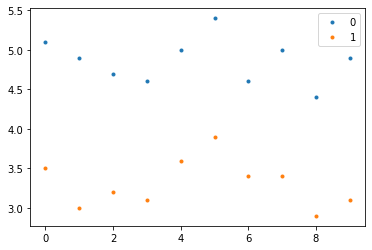

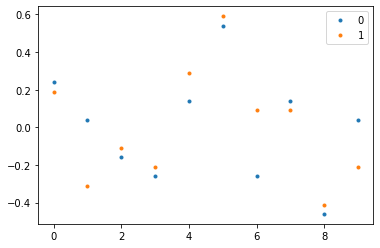

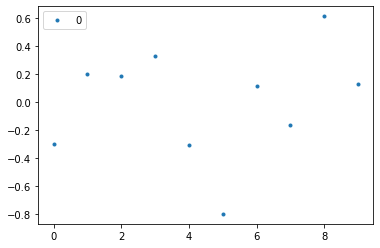

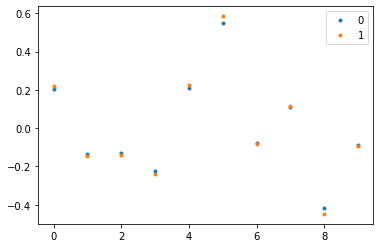

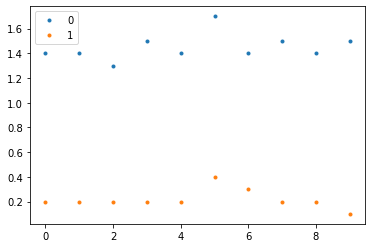

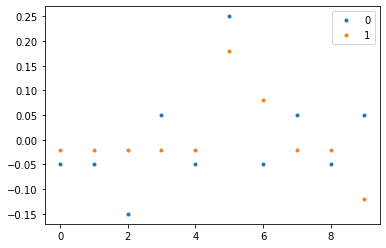

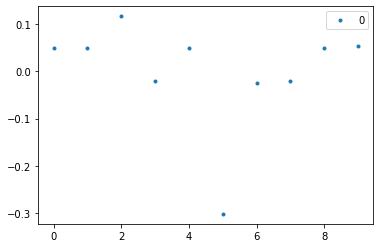

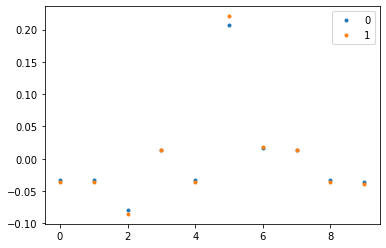

In [ ]:
sample1.plot(style=".")
sample_centered.plot(style=".")
test_res_df.plot(style=".")
test_back.plot(style=".")




sample2.plot(style=".")
sample_centered2.plot(style=".")
test_res_df2.plot(style=".")
test_back2.plot(style=".")







## **FE**

In [ ]:
res_fe = sample_centered.dot(sample_centered.T)

print(res_fe)
vars_fe = np.trace(res_fe)
print(vars)


w_fe, v_fe = np.linalg.eig(res_fe)
#w2 = w2/vars2

sort_index_fe = np.argsort(w_fe)
print(sort_index_fe)
print("REs W and Vs:")
print(w_fe)
print(v_fe)
print("Chosen V")
print( v_fe[:,sort_index_fe[-1]])

        0       1       2       3  ...       6       7       8       9
0  0.0937 -0.0493 -0.0593 -0.1023  ... -0.0453  0.0507 -0.1883 -0.0303
1 -0.0493  0.0977  0.0277  0.0547  ... -0.0383 -0.0223  0.1087  0.0667
2 -0.0593  0.0277  0.0377  0.0647  ...  0.0317 -0.0323  0.1187  0.0167
3 -0.1023  0.0547  0.0647  0.1117  ...  0.0487 -0.0553  0.2057  0.0337
4  0.0887 -0.0843 -0.0543 -0.0973  ... -0.0103  0.0457 -0.1833 -0.0553
5  0.2417 -0.1613 -0.1513 -0.2643  ... -0.0873  0.1287 -0.4903 -0.1023
6 -0.0453 -0.0383  0.0317  0.0487  ...  0.0757 -0.0283  0.0827 -0.0293
7  0.0507 -0.0223 -0.0323 -0.0553  ... -0.0283  0.0277 -0.1013 -0.0133
8 -0.1883  0.1087  0.1187  0.2057  ...  0.0827 -0.1013  0.3797  0.0677
9 -0.0303  0.0667  0.0167  0.0337  ... -0.0293 -0.0133  0.0677  0.0457

[10 rows x 10 columns]
1.6130000000000004
[5 6 7 9 8 1 4 3 2 0]
REs W and Vs:
[ 1.44192289e+00+0.0000000e+00j  2.29685689e-17+0.0000000e+00j
  1.71077109e-01+0.0000000e+00j  6.22482820e-17+0.0000000e+00j
  2.91781777e-

In [ ]:
v_fe[:,sort_index_fe[-1]]*w_fe[sort_index_fe[-1]]

array([ 0.3634856 +0.j, -0.23907119+0.j, -0.22770655+0.j, -0.39743036+0.j,
        0.36916791+0.j,  0.96036006+0.j, -0.13432118+0.j,  0.19376179+0.j,
       -0.73687796+0.j, -0.15136813+0.j])

## **LDA**

1.44192289
1.44192289e

-0.209930
0.138075
0.131511
0.229535
-0.213212
-0.554653
0.077577
-0.111906
0.425581
0.087422

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#iris_data.sample(n=20)
sample = iris_data
sample[4] = le.fit_transform(sample[4])
sample_x1 = sample.iloc[:,0:2]
sample_x2 = sample.iloc[:,2:4]
sample_y = sample.iloc[:,4:5]

#sample_y = pd.DataFrame(le.fit_transform(sample_y))

# print(sample_x)
# print(sample_y)
sW = np.zeros((2,2))
sB = np.zeros((2,2))
sW = pd.DataFrame(sW)
sB = pd.DataFrame(sB)
y_s = np.unique(sample_y)
print(y_s)
print("X2")
print(sample_x2)
mean_t = pd.DataFrame(sample_x1.agg('mean'))
for c in y_s:
  test = sample_y == c
  print(c)
  X_c = sample_x1[test.values]
  print(X_c)
  mean_c = pd.DataFrame(X_c.agg('mean'))
  mean_diff_c = mean_c - mean_t
  
  sW+=mean_c.dot(mean_c.T)
  sB+=mean_diff_c.dot(mean_diff_c.T)
  print("sW")
  print(mean_c.dot(mean_c.T))
  print("sB")
  print(mean_diff_c.dot(mean_diff_c.T))

# print("SW & SB")
# print(sW)
# print(sB)


res_lda = np.linalg.inv(sW).dot(sB)
print(np.linalg.inv(sW))
# w_lda,v_lda = np.linalg.eig(res_lda)
# sort_index_lda = np.argsort(w_lda)
# print(sort_index_lda)
# print("REs W and Vs:")
# print(w_lda)
# print(v_lda)
# print("Chosen V")
# print( v_lda[:,sort_index_lda[-1]])


[0 1 2]
X2
       2    3
0    1.4  0.2
1    1.4  0.2
2    1.3  0.2
3    1.5  0.2
4    1.4  0.2
..   ...  ...
145  5.2  2.3
146  5.0  1.9
147  5.2  2.0
148  5.4  2.3
149  5.1  1.8

[150 rows x 2 columns]
0
      0    1
0   5.1  3.5
1   4.9  3.0
2   4.7  3.2
3   4.6  3.1
4   5.0  3.6
5   5.4  3.9
6   4.6  3.4
7   5.0  3.4
8   4.4  2.9
9   4.9  3.1
10  5.4  3.7
11  4.8  3.4
12  4.8  3.0
13  4.3  3.0
14  5.8  4.0
15  5.7  4.4
16  5.4  3.9
17  5.1  3.5
18  5.7  3.8
19  5.1  3.8
20  5.4  3.4
21  5.1  3.7
22  4.6  3.6
23  5.1  3.3
24  4.8  3.4
25  5.0  3.0
26  5.0  3.4
27  5.2  3.5
28  5.2  3.4
29  4.7  3.2
30  4.8  3.1
31  5.4  3.4
32  5.2  4.1
33  5.5  4.2
34  4.9  3.1
35  5.0  3.2
36  5.5  3.5
37  4.9  3.1
38  4.4  3.0
39  5.1  3.4
40  5.0  3.5
41  4.5  2.3
42  4.4  3.2
43  5.0  3.5
44  5.1  3.8
45  4.8  3.0
46  5.1  3.8
47  4.6  3.2
48  5.3  3.7
49  5.0  3.3
sW
           0          1
0  25.060036  17.110508
1  17.110508  11.682724
sB
          0         1
0  0.701127 -0.304789
1 -0.30478

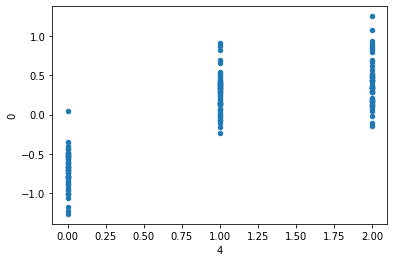

In [ ]:
v_lda_1 = pd.DataFrame( v_lda[:,sort_index_lda[-1]])
test3 = sample_x1.dot(v_lda_1)
result_test_concat = pd.concat([test3, sample_y], axis=1)

result_test_concat.plot.scatter(x=4,y=0)

            0  1
0    2.865507  0
1    2.893213  0
2    3.055749  0
3    2.921249  0
4    2.906751  0
..        ... ..
145 -2.173019  2
146 -1.783549  2
147 -2.005057  2
148 -2.134714  2
149 -1.657082  2

[150 rows x 2 columns]


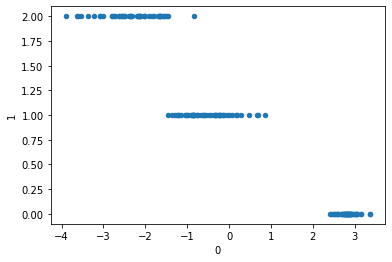

In [ ]:
#test_proj = pd.DataFrame(test_proj)
#test_proj_y = pd.DataFrame(le.fit_transform(iris_data[4]))
#test_proj_y.columns=[1]
#result_test_concat2 = pd.concat([test_proj,test_proj_y ], axis=1)
print(result_test_concat2)
result_test_concat2.plot.scatter(x=0,y=1)


In [ ]:
print(sample_x2)
# print(test)
# test2 = sample_x[test.values]

# print(test2.agg('mean'))

       2    3
49   1.4  0.2
23   1.7  0.5
17   1.4  0.3
48   1.5  0.2
36   1.3  0.2
115  5.3  2.3
109  6.1  2.5
7    1.5  0.2
44   1.9  0.4
3    1.5  0.2
54   4.6  1.5
21   1.5  0.4
20   1.7  0.2
77   5.0  1.7
132  5.6  2.2
32   1.5  0.1
133  5.1  1.5
73   4.7  1.2
114  5.1  2.4
123  4.9  1.8


## **CCA**

In [ ]:
cca_x = iris_data.iloc[:,0:2]
cca_y = iris_data.iloc[:,2:4]


test_cca_x=iris_data.iloc[:,3]

means_x = cca_x.agg('mean')
cca_x_centered = cca_x - means_x

means_y = cca_y.agg('mean')
cca_y_centered = cca_y - means_y
Sxy = cca_x_centered.T.dot(cca_y_centered)
Syx = cca_y_centered.T.dot(cca_x_centered)
Sxx = cca_x_centered.T.dot(cca_x_centered)
Syy = cca_y_centered.T.dot(cca_y_centered)
#cca_y
print(Sxx)
print(Syy)
print("Voc")
print(Sxy)
print(Syx)

res_cca_2 =np.linalg.inv(Syy).dot(Syx).dot(np.linalg.inv(Sxx)).dot(Sxy)
res_cca_1 =np.linalg.inv(Sxx).dot(Sxy).dot(np.linalg.inv(Syy)).dot(Syx)
w_cca2,v_cca2 = np.linalg.eig(res_cca_2)
w_cca1,v_cca1 = np.linalg.eig(res_cca_1)
print(w_cca1)
print(v_cca1)
print(w_cca2)
print(v_cca2)


sort_cca_index1 = np.argsort(w_cca1)
sort_cca_index2 = np.argsort(w_cca2)
print("Chosen vector")
print( v_cca2[:,sort_cca_index2[-1]])

test1=cca_x_centered.dot(v_cca1[:,sort_cca_index1[-1]].reshape((-1, 1)))
test2=cca_y_centered.dot(v_cca2[:,sort_cca_index2[-1]].reshape((-1, 1)))
test1=pd.DataFrame(test1)
test2=pd.DataFrame(test2)

print(test1)
print("Means")
print(test1.agg('mean'))
print(test2.agg('mean'))
projected_cca =pd.concat([test1, test2], axis=1)

print(projected_cca.corr())
print(projected_cca)

##0,9408971782293749 => sqrt(lambda)



            0        1
0  102.168333  -5.8510
1   -5.851000  28.0126
            2           3
2  463.863733  193.161733
3  193.161733   86.779733
Voc
            2          3
0  189.778667  77.018667
1  -47.935200 -17.579200
            0        1
2  189.778667 -47.9352
3   77.018667 -17.5792
[0.8852875 0.0171806]
[[ 0.78036601  0.25599758]
 [-0.62532303  0.96667742]]
[0.8852875 0.0171806]
[[ 0.77159805 -0.3707913 ]
 [-0.63611041  0.92871622]]
Chosen vector
[ 0.77159805 -0.63611041]
            0
0   -0.858966
1   -0.702378
2   -0.983516
3   -0.999020
4   -0.999535
..        ...
145  0.702281
146  0.702796
147  0.546208
148  0.061969
149  0.077988

[150 rows x 1 columns]
Means
0   -6.025735e-16
dtype: float64
0   -1.609823e-15
dtype: float64
          0         0
0  1.000000  0.940897
0  0.940897  1.000000
            0         0
0   -0.858966 -1.184680
1   -0.702378 -1.184680
2   -0.983516 -1.261840
3   -0.999020 -1.107521
4   -0.999535 -1.184680
..        ...       ...
145  0.702281

## **FA**

In [ ]:
sample_fa = iris_data.iloc[:,0:4]
means_fa = sample_fa.agg('mean')
std_devs_fa = sample_fa.agg('std')
sample_fa_centered = sample_fa - means_fa
n_fa = len(sample_fa)
factor_count=3
print("Data Matrix")
print(sample_fa_centered)
print("Stdev")
print(std_devs_fa)
print("Changed")
sample_fa_centered = sample_fa_centered/(std_devs_fa)
print(sample_fa_centered)
print("N")
print(n_fa)
res_fa = sample_fa_centered.T.dot(sample_fa_centered)/(n_fa-1)

print(res_fa)
w_fa, v_fa = np.linalg.eig(res_fa)


sort_index_fa = np.argsort(w_fa)
sort_index_fa=np.flip(sort_index_fa)
print(sort_index_fa)
print("REs W and Vs:")
print(w_fa)
print(v_fa)
print("Chosen V")
chosen_v_fa = v_fa[:,sort_index_fa[:factor_count]]
chosen_w_fa = w_fa[sort_index_fa[:factor_count]]
print(chosen_v_fa )

D_matrix = np.sqrt(np.identity(factor_count)*chosen_w_fa)
print("D")
print(D_matrix)

V_matrix = chosen_v_fa.dot(D_matrix)
print("V Matrix:")
print(V_matrix)
print("VVt:")
VVt_matrix =V_matrix.dot(V_matrix.T)
print(VVt_matrix)

Fi_matrix = res_fa - VVt_matrix
print("FI matrix")
Fi_matrix = np.diag(np.diag(Fi_matrix))
print(Fi_matrix)

projected_fa = sample_fa_centered.dot(np.linalg.inv(res_fa)).dot(V_matrix)
print(projected_fa)

print(projected_fa.T.dot(projected_fa))


Data Matrix
            0      1         2         3
0   -0.743333  0.446 -2.358667 -0.998667
1   -0.943333 -0.054 -2.358667 -0.998667
2   -1.143333  0.146 -2.458667 -0.998667
3   -1.243333  0.046 -2.258667 -0.998667
4   -0.843333  0.546 -2.358667 -0.998667
..        ...    ...       ...       ...
145  0.856667 -0.054  1.441333  1.101333
146  0.456667 -0.554  1.241333  0.701333
147  0.656667 -0.054  1.441333  0.801333
148  0.356667  0.346  1.641333  1.101333
149  0.056667 -0.054  1.341333  0.601333

[150 rows x 4 columns]
Stdev
0    0.828066
1    0.433594
2    1.764420
3    0.763161
dtype: float64
Changed
            0         1         2         3
0   -0.897674  1.028611 -1.336794 -1.308593
1   -1.139200 -0.124540 -1.336794 -1.308593
2   -1.380727  0.336720 -1.393470 -1.308593
3   -1.501490  0.106090 -1.280118 -1.308593
4   -1.018437  1.259242 -1.336794 -1.308593
..        ...       ...       ...       ...
145  1.034539 -0.124540  0.816888  1.443121
146  0.551486 -1.277692  0.703536  

## **MDS**

In [ ]:
sample_mds = iris_data.iloc[:,0:4]
means_mds = sample_mds.agg('mean')
sample_mds_centered = sample_mds - means_mds
res_mds = sample_mds_centered.dot(sample_mds_centered.T)

print(res_mds)


w_mds, v_mds = np.linalg.eig(res_mds)
# #w2 = w2/vars2
print()
sort_index_mds = np.argsort(w_mds)
print(sort_index_mds)
print("REs W and Vs:")
print(w_mds)
print(v_mds)
print("Chosen V")
print( v_mds[:,sort_index_mds[-1]].shape)

          0         1         2    ...       147       148       149
0    7.312104  7.237771  7.711504  ... -4.712096 -5.082029 -3.830496
1    7.237771  7.453437  7.867171  ... -4.816429 -5.326363 -3.814829
2    7.711504  7.867171  8.370904  ... -5.102696 -5.492629 -3.971096
3    7.269504  7.495171  7.978904  ... -4.874696 -5.234629 -3.703096
4    7.431037  7.326704  7.840437  ... -4.783163 -5.083096 -3.841563
..        ...       ...       ...  ...       ...       ...       ...
145 -5.160363 -5.304696 -5.630963  ...  3.525437  3.865504  2.647037
146 -4.214829 -4.029163 -4.355429  ...  2.680971  2.781037  2.142571
147 -4.712096 -4.816429 -5.102696  ...  3.153704  3.463771  2.455304
148 -5.082029 -5.326363 -5.492629  ...  3.463771  4.153837  2.865371
149 -3.830496 -3.814829 -3.971096  ...  2.455304  2.865371  2.166904

[150 rows x 150 columns]

[ 13  15  14  16  20  19  28  27  32  18  17  12  11  31  30  47  46  35
  34  55  57  56  70  69  76  75  54  53  81  84  86  85  66  65  37  36

## **MLE Tests**

In [ ]:
import math

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#iris_data.sample(n=20)
sample_mle = iris_data
sample_mle[4] = le.fit_transform(sample_mle[4])
# test =np.random.dirichlet(np.ones(3),size=1).reshape(-1)
# print(test)
# print(sum(test))



def likelihood_multinomial(data,k):
  n = len(data)
  p_k = data.value_counts(normalize=True)
  print(p_k)
  p_k2 =np.random.dirichlet(np.ones(3),size=1).reshape(-1)
  n_k = data.value_counts()
  print(p_k2)
  likelihood = likelihood_2 = math.factorial(n)
  for i in range(k):
    likelihood = likelihood*(1/math.factorial(n_k[i]))*(p_k[i]**n_k[i])
    likelihood_2 = likelihood_2*(1/math.factorial(n_k[i]))*(p_k2[i]**n_k[i])
  
  print(likelihood)
  print(likelihood_2)


data = sample_mle[4]
k = len(pd.unique(sample_mle[4]))
likelihood_multinomial(data,k)
print(k)

2    0.333333
1    0.333333
0    0.333333
Name: 4, dtype: float64
[0.05270871 0.11744796 0.82984333]
0.005488840180774196
6.9801710478150806e-46
3


## **EM**

In [ ]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

In [ ]:
sample_em = iris_data.iloc[:,0:2]
means_em = sample_em.agg('mean')
std_devs_em = sample_em.agg('std')
sample_em_centered = sample_em - means_em

sample_em_norm = sample_em_centered/std_devs_em


print(sample_em_norm)

            0         1
0   -0.897674  1.028611
1   -1.139200 -0.124540
2   -1.380727  0.336720
3   -1.501490  0.106090
4   -1.018437  1.259242
..        ...       ...
145  1.034539 -0.124540
146  0.551486 -1.277692
147  0.793012 -0.124540
148  0.430722  0.797981
149  0.068433 -0.124540

[150 rows x 2 columns]


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(sample_em_norm)
kmeans.cluster_centers_[1]

## 4 lü kendi datasetteki classlarını bulabilecek mi?

array([ 0.4874812 , -0.44511654])

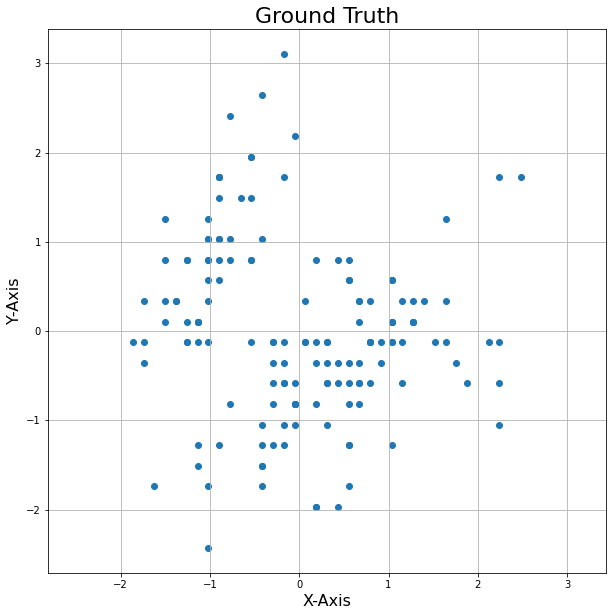

In [ ]:
# sample_em_norm.iloc[:,0]
plt.figure(figsize=(10,10))                                 
plt.scatter(sample_em_norm.iloc[:,0], sample_em_norm.iloc[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

In [ ]:
m1 = np.array(sample_em_norm.sample()).reshape(-1)
m2 = np.array(sample_em_norm.sample()).reshape(-1)
cov1 = np.cov(np.transpose(sample_em_norm))
cov2 = np.cov(np.transpose(sample_em_norm))
pi = 0.5

print(m1)

[ 0.30995914 -0.58580104]


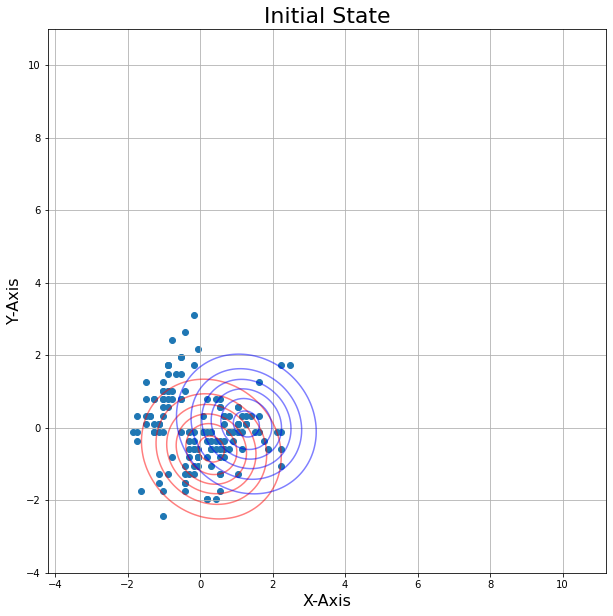

In [ ]:
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(sample_em_norm.iloc[:,0], sample_em_norm.iloc[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [ ]:
d = np.array(sample_em_norm)


In [ ]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    # print("Here")
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [ ]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0
    # print("Here2")
    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [ ]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

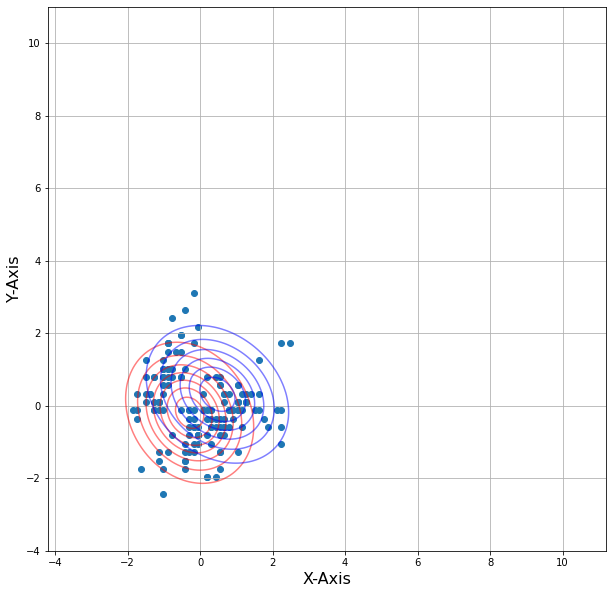

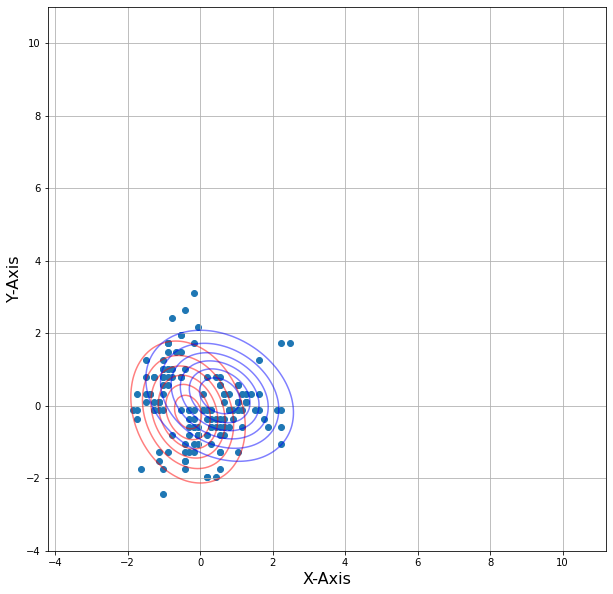

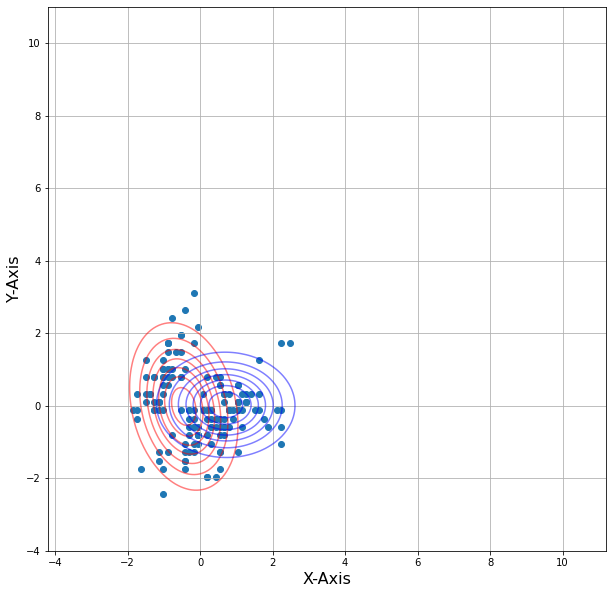

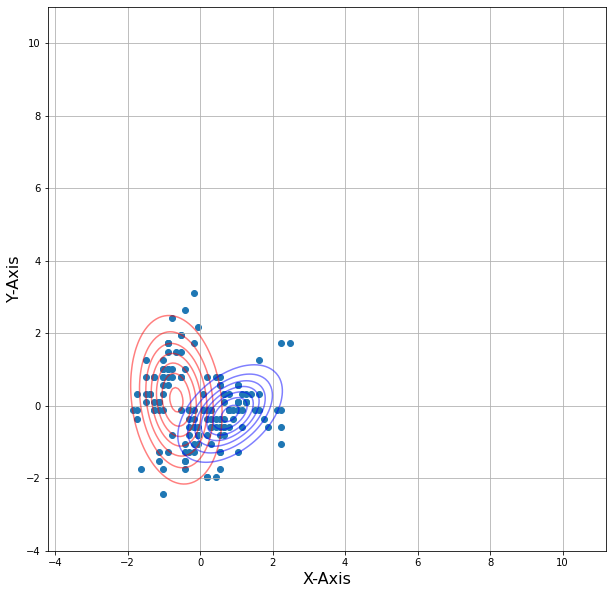

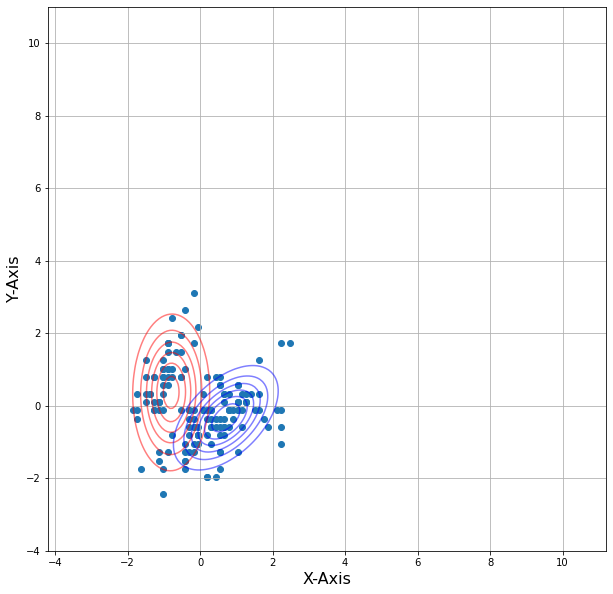

In [ ]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)

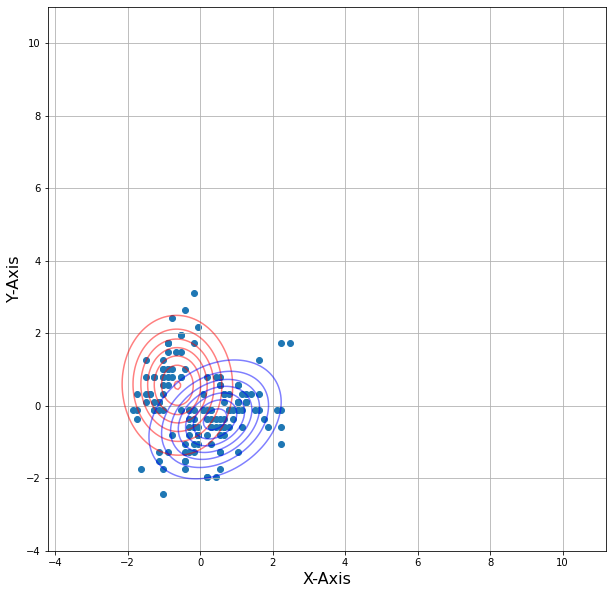

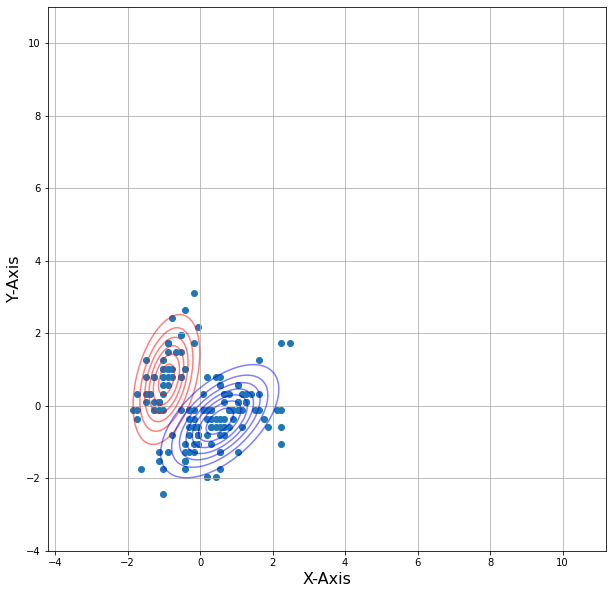

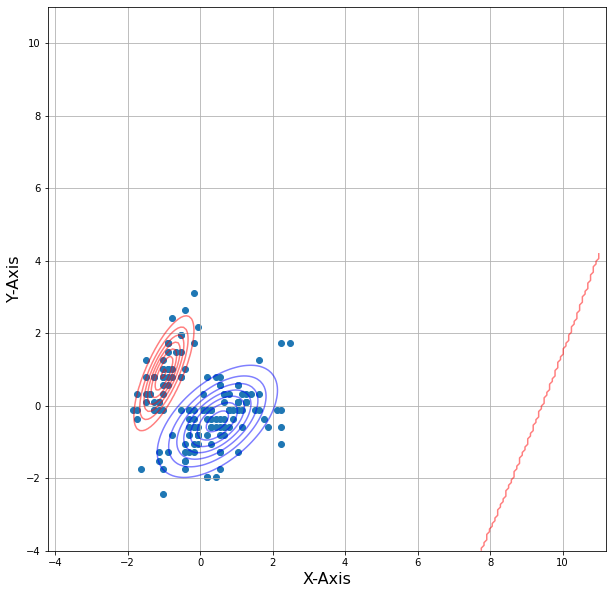

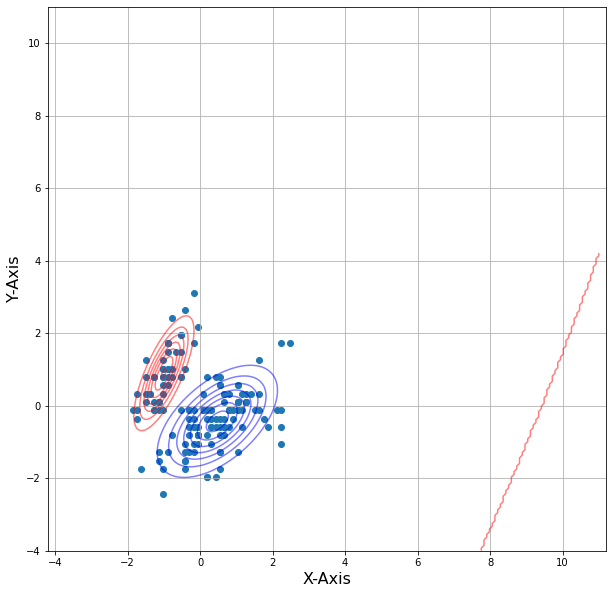

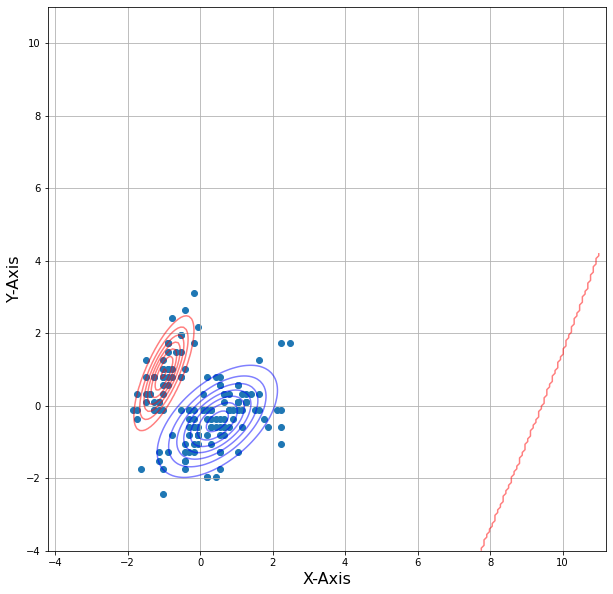

In [ ]:
iterations = 20
lis1=[kmeans.cluster_centers_[0],kmeans.cluster_centers_[1],cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)